In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=F%2CTOT
df = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=F", sep =";")
df_tot = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=TOT", sep =";")
df["TOTAL"] = df_tot['INDHOLD']
df['% of total is divorced'] = df.apply(lambda row: row.INDHOLD/row.TOTAL*100,axis = 1)
df.head()





,TID,CIVILSTAND,INDHOLD,TOTAL,% of total is divorced
0,2008K1,Fraskilt,428864,5475791,7.832001
1,2008K2,Fraskilt,431550,5482266,7.871745
2,2008K3,Fraskilt,432713,5489022,7.883244
3,2008K4,Fraskilt,432156,5505995,7.848827
4,2009K1,Fraskilt,434233,5511451,7.878742


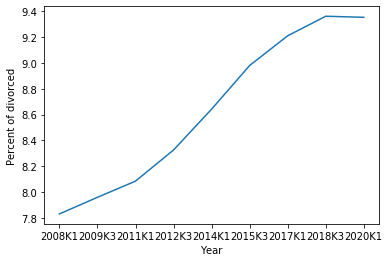

In [220]:
#Ex1 5A
people = df.iloc[::6,2]
year = df.iloc[::6,0]
people_tot = df.iloc[::6,3]
people_div = df.iloc[::6,4]
#print(year)
#print(people)
#print(people_tot)
plt.xlabel('Year')
plt.ylabel('Percent of divorced')
plt.plot(year,people_div)
#plt.plot(year,people)
#plt.plot(year,people_tot)



In [175]:
#Ex1 5B
df = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=U", sep =";")
df_tot = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=TOT", sep =";")
df['TOTAL'] = df_tot['INDHOLD']
df['% of total is unmarried'] = df.apply(lambda row: row.INDHOLD/row.TOTAL*100,axis = 1)
df=df.iloc[1:] #dropping first row which is the whole country
df.shape
biggest = df.nlargest(104,'TOTAL')
biggest.head() #5 largest is here the 5 first index
#answer is København

,OMRÅDE,CIVILSTAND,TID,INDHOLD,TOTAL,% of total is unmarried
1,Region Hovedstaden,Ugift,2020K1,973802,1846023,52.751347
73,Region Midtjylland,Ugift,2020K1,653428,1326340,49.265498
50,Region Syddanmark,Ugift,2020K1,568126,1223105,46.449487
32,Region Sjælland,Ugift,2020K1,368715,837359,44.033085
2,København,Ugift,2020K1,412512,632340,65.235791


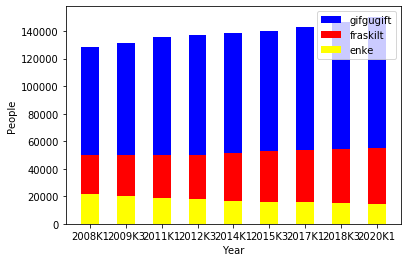

In [235]:
#Ex1 5C
#https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&OMR%C3%85DE=101&CIVILSTAND=G%2CE%2CF
df = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&OMR%C3%85DE=101&CIVILSTAND=G%2CE%2CF", sep = ";")
df.head()
propertable = df.pivot_table(values='INDHOLD',index='TID',columns='CIVILSTAND')
#print(propertable.index[::6])
#year = propertable.iloc[:,1]
#print(propertable)
enke = propertable.iloc[::6,0]
fraskilt = propertable.iloc[::6,1]
giftugift = propertable.iloc[::6,2]
#print(enke)
plt.xlabel('Year')
plt.ylabel('People')
plt.bar(propertable.index[::6],giftugift, width=0.5, linewidth=0, align='center', color='blue',label='gifgugift')
plt.bar(propertable.index[::6],fraskilt, width=0.5, linewidth=0, align='center', color='red',label='fraskilt')
plt.bar(propertable.index[::6],enke, width=0.5, linewidth=0, align='center', color='yellow',label='enke')
plt.legend()



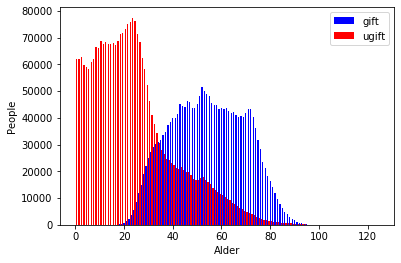

In [283]:
#Ex1 5D
#laver to reads for lettere at kunne lave en enkelt tabel
df = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=G", sep = ";")
df_u = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U", sep = ";")
df['UGIFT'] = df_u['INDHOLD']
df.rename(columns={'INDHOLD': 'GIFT/SEP'}, inplace=True)
#df['% of total is unmarried'] = df.apply(lambda row: row.INDHOLD/row.TOTAL*100,axis = 1)
df=df.iloc[2:] #dropping first two rows which is the whole country
del df['CIVILSTAND']
del df['TID']
df.set_index('ALDER', inplace=True)
df.head()
gift = df.iloc[:,0]
ugift = df.iloc[:,1]
#print(gift)
X = np.arange(125) # 125values
plt.xlabel('Alder')
plt.ylabel('People')
plt.bar(X,gift, width=0.5, linewidth=0, align='center', color='blue',label='gift')
plt.bar(X + 0.5,ugift, width=0.5, linewidth=0, align='center', color='red',label='ugift')
plt.legend()
